# CAP5415 Fall 2014
# Assignment 3 Part B - SVM

Implement Support Vector Machine (SVM) using Quadratic Programming.

i. Try to understand each input term in Matlab built-in Quadratic Programming function ‘quadprog’.

ii. Formulate soft- margin primal SVM in term of inputs of ‘quadprog’

iii. Show your ‘H’, ‘A’ and ‘f’ Matrices.

iv. Obtain parameter vector ‘w’ and bias term ‘b’ using ‘quadprog’.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 7]

### Generate Training Data

In [2]:
data = np.zeros((20, 3), dtype=np.int)

In [3]:
def f(x):
    return (3*x)+2

def f_noise_pos(x):
    return f(x) + np.random.normal(10, 3)

def f_noise_neg(x):
    return f(x) + np.random.normal(-15, 4)

In [4]:
posx = np.arange(10)
posy = map(f_noise_pos, posx)
negx = posx + 0.5
negy = map(f_noise_neg, negx)

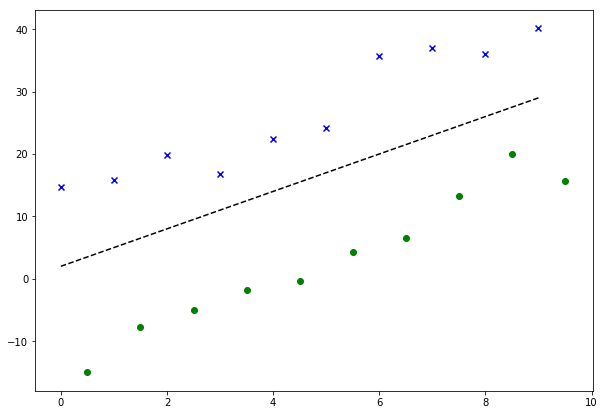

In [39]:
plt.scatter(posx, posy, marker='x', c='b')
plt.scatter(negx, negy, marker='o', c='g')
plt.plot(map(f, posx), c='k', linestyle='--')

Combine training data into a single array

In [6]:
allx = np.concatenate((posx, negx))
ally = np.concatenate((posy, negy))
allz = np.concatenate((np.ones(len(posx)), -1 * np.ones(len(negx))))
alldata = np.vstack((allx, ally, allz)).T
print alldata.shape
alldata[15,:]

(20, 3)


array([ 5.5       ,  4.23548811, -1.        ])

### Generate Testing Data

In [7]:
testx_pos = posx + np.random.normal(2, 3)
testy_pos = map(f_noise_pos, testx_pos)
testx_neg = negx + np.random.normal(2, 3)
testy_neg = map(f_noise_neg, testx_neg)

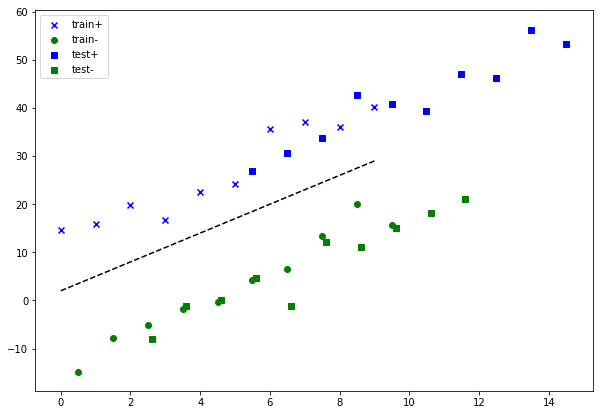

In [40]:
plt.scatter(posx, posy, marker='x', c='b', label='train+')
plt.scatter(negx, negy, marker='o', c='g', label='train-')

plt.scatter(testx_pos, testy_pos, c='b', marker='s', label='test+')
plt.scatter(testx_neg, testy_neg, c='g', marker='s', label='test-')

plt.plot(map(f, posx), c='k', linestyle='--')
plt.legend()

In [9]:
alltestx = np.concatenate((testx_pos, testx_neg))
alltesty = np.concatenate((testy_pos, testy_neg))
alltestz = np.concatenate((np.ones(len(testx_pos)), -1 * np.ones(len(testx_neg))))
alltestdata = np.vstack((alltestx, alltesty, alltestz)).T
print alltestdata.shape
alltestdata

(20, 3)


array([[ 5.49008819, 26.82275199,  1.        ],
       [ 6.49008819, 30.64038393,  1.        ],
       [ 7.49008819, 33.81191953,  1.        ],
       [ 8.49008819, 42.7106165 ,  1.        ],
       [ 9.49008819, 40.810457  ,  1.        ],
       [10.49008819, 39.34178714,  1.        ],
       [11.49008819, 46.96867595,  1.        ],
       [12.49008819, 46.13734763,  1.        ],
       [13.49008819, 56.22768036,  1.        ],
       [14.49008819, 53.35059354,  1.        ],
       [ 2.60717336, -7.95740414, -1.        ],
       [ 3.60717336, -1.17281876, -1.        ],
       [ 4.60717336,  0.15134023, -1.        ],
       [ 5.60717336,  4.67568166, -1.        ],
       [ 6.60717336, -1.14631174, -1.        ],
       [ 7.60717336, 12.14068254, -1.        ],
       [ 8.60717336, 11.05815723, -1.        ],
       [ 9.60717336, 14.9825262 , -1.        ],
       [10.60717336, 18.11095285, -1.        ],
       [11.60717336, 21.14456346, -1.        ]])

### "Train" SVM

In [10]:
cols2 = np.reshape(np.arange(20), (2, -1))
print cols2.shape
np.prod(cols2, axis=0)

(2, 10)


array([  0,  11,  24,  39,  56,  75,  96, 119, 144, 171])

Using matlab quadprog style...

`x = quadprog(H,f,A,b,Aeq,beq)` solves the preceding problem subject to the additional restrictions `Aeq*x = beq`. `Aeq` is a matrix of doubles, and beq is a vector of doubles. If no inequalities exist, set `A = []` and `b = []`.


In [11]:
import cvxopt as opt

In [12]:
n_examples = len(alldata)
print n_examples

20


In [13]:
f_ = -1 * np.ones(n_examples)
H = np.outer(allz, allz) * np.dot(alldata[:,:2], alldata[:,:2].T)
A = -1 * np.eye(n_examples)  # need a -1 because the objective was multiplied by -1 as well!
b = np.zeros((n_examples))
Aeq = np.expand_dims(allz, 1).T
beq = np.array([0])

In [14]:
f_ = opt.matrix(f_, tc='d')
H_ = opt.matrix(H)
A_ = opt.matrix(A)
b_ = opt.matrix(b)
Aeq_ = opt.matrix(Aeq)
beq_ = opt.matrix(beq, tc='d')

In [15]:
beq_

<1x1 matrix, tc='d'>

In [16]:
result = opt.solvers.qp(H_, f_, A_, b_, Aeq_, beq_)
soln = result['x']

     pcost       dcost       gap    pres   dres
 0: -8.9056e-01 -1.3804e+00  4e+01  6e+00  1e+00
 1: -3.2007e-01 -2.9738e-01  3e+00  4e-01  1e-01
 2: -6.1938e-02 -2.0747e-01  2e-01  1e-02  3e-03
 3: -8.9359e-02 -1.1181e-01  2e-02  5e-05  1e-05
 4: -9.7172e-02 -1.0171e-01  5e-03  9e-06  2e-06
 5: -1.0076e-01 -1.0103e-01  3e-04  5e-08  1e-08
 6: -1.0095e-01 -1.0095e-01  3e-06  5e-10  1e-10
 7: -1.0095e-01 -1.0095e-01  3e-08  5e-12  1e-12
Optimal solution found.


In [17]:
lambdas = np.array(soln)
lambdas

array([[1.39214138e-09],
       [1.70332413e-09],
       [1.65411357e-09],
       [4.00513580e-02],
       [5.24175967e-09],
       [6.09026845e-02],
       [1.34740720e-09],
       [1.79039261e-09],
       [2.77774617e-09],
       [3.84320725e-09],
       [1.63608703e-09],
       [3.97528194e-09],
       [2.86632985e-09],
       [2.66094910e-09],
       [1.72209819e-09],
       [2.09452369e-09],
       [1.67701098e-09],
       [3.33666328e-09],
       [1.00954041e-01],
       [1.36007462e-09]])

In [18]:
THRESHOLD = 1e-5
support_vectors_idx = np.where(lambdas > THRESHOLD)[0]
sv_lambdas = lambdas[support_vectors_idx]
sv_lambdas

array([[0.04005136],
       [0.06090268],
       [0.10095404]])

In [19]:
n_support = len(support_vectors_idx)
n_support

3

In [20]:
sv_alldata = alldata[support_vectors_idx]
sv_alldata.shape

(3, 3)

Compute w

In [21]:
a = np.squeeze(lambdas)
print alldata[:, 2].shape, a.shape
y_a = alldata[:,2] * a
print y_a.shape, y_a
y_a_x = alldata[:,:2] * np.expand_dims(y_a, axis=1)
print y_a_x.shape
w = np.sum(y_a_x, axis=0)
print w.shape, w

(20,) (20,)
(20,) [ 1.39214138e-09  1.70332413e-09  1.65411357e-09  4.00513580e-02
  5.24175967e-09  6.09026845e-02  1.34740720e-09  1.79039261e-09
  2.77774617e-09  3.84320725e-09 -1.63608703e-09 -3.97528194e-09
 -2.86632985e-09 -2.66094910e-09 -1.72209819e-09 -2.09452369e-09
 -1.67701098e-09 -3.33666328e-09 -1.00954041e-01 -1.36007462e-09]
(20, 2)
(2,) [-0.43344184  0.11847499]


Compute b

b values are the same, no matter which support vector they are computed with!

In [22]:
for sample in range(len(sv_alldata)):
    print sv_alldata[sample,2] - np.dot(w.T, sv_alldata[sample, :2])

0.31009508343980574
0.3100950424991562
0.31009513703636316


In [23]:
b = sv_alldata[0,2] - np.dot(w.T, sv_alldata[0, :2])
b

0.31009508343980574

### Evaluate SVM on test data

In [24]:
def infer(x, soft=False):
    if not soft:
        return np.sign(np.dot(w, x) + b)
    return np.dot(w, x) + b

In [25]:
testy_pos_inferred = np.array(map(infer, alltestdata[:10,:2]))
pos_inferred_correct = np.count_nonzero(testy_pos_inferred >= 0)
print 'pos test data: {}% correct '.format(
    pos_inferred_correct / float(len(testx_pos)) * 100)

testy_neg_inferred = np.array(map(infer, alltestdata[10:,:2]))
neg_inferred_correct = np.count_nonzero(testy_neg_inferred < 0)
print 'neg test data: {}% correct '.format(
    neg_inferred_correct / float(len(testx_neg)) * 100)

pos test data: 100.0% correct 
neg test data: 100.0% correct 


# Plot dividing line and the support vectors.
The dividing line is wx+b = 0.

`x_hat` is a point that lies on the divding line.

In [26]:
x_hat = np.linalg.pinv(np.expand_dims(w, axis=1)) *  -1 * b
x_hat

array([[ 0.66568973, -0.18195656]])

In [27]:
np.all(np.isclose(np.dot(w, x_hat.T) + b, 0)) == True

True

In [28]:
print w, b

[-0.43344184  0.11847499] 0.31009508343980574


In [29]:
def solveforx1(x0, w, b):
    return (-1 * b - (w[0] * x0)) / w[1]
x0 = 1
x_hat_1 = np.array([x0, solveforx1(x0, w, b)])
x0 = 0
x_hat_0 = np.array([x0, solveforx1(x0, w, b)])
print x_hat_0, x_hat_1

[ 0.         -2.61738852] [1.         1.04112061]


In [42]:
# A version of solveforx1 that assumes w and b from the variable scope, for map() usage.
def solveforx1(x0):
    return (-1 * b - (w[0] * x0)) / w[1]
x0 = 0
x_hat_1 = np.array([x0, solveforx1(x0)])
x_hat_1

array([ 0.        , -2.61738852])

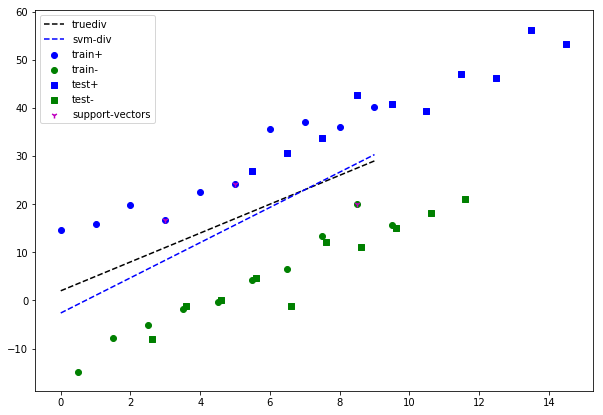

In [41]:
sv_alldata_pos = sv_alldata[sv_alldata[:, 2] > 0]
sv_alldata_neg = sv_alldata[sv_alldata[:, 2] < 0]

plt.scatter(posx, posy, marker='o', c='b', label='train+')
plt.scatter(negx, negy, marker='o', c='g', label='train-')

plt.scatter(testx_pos, testy_pos, c='b', marker='s', label='test+')
plt.scatter(testx_neg, testy_neg, c='g', marker='s', label='test-')

plt.plot(map(f, posx), c='k', linestyle='--', label='truediv')
plt.scatter(sv_alldata[:, 0], sv_alldata[:, 1], c='m', marker='1', label='support-vectors')
plt.plot(map(solveforx1, posx), c='b', linestyle='--', label='svm-div')
plt.legend()

## References

https://seat.massey.ac.nz/personal/s.r.marsland/Code/Ch8/svm.py

http://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf -- especially slide 18

https://ai6034.mit.edu/wiki/images/SVM_and_Boosting.pdf -- general good SVM resource.

https://stackoverflow.com/questions/36510859/cvxopt-qp-solver-typeerror-a-must-be-a-d-matrix-with-1000-columns -- StackOverflow impl